# Logistic regression

In [3]:
from util.functions import train
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 10000)

results = train(model)

    

learning with mean imputed data
learning with median imputed data
learning with mode imputed data
learning with KNN imputed data
learning with MICE imputed data
learning with iterative imputed data


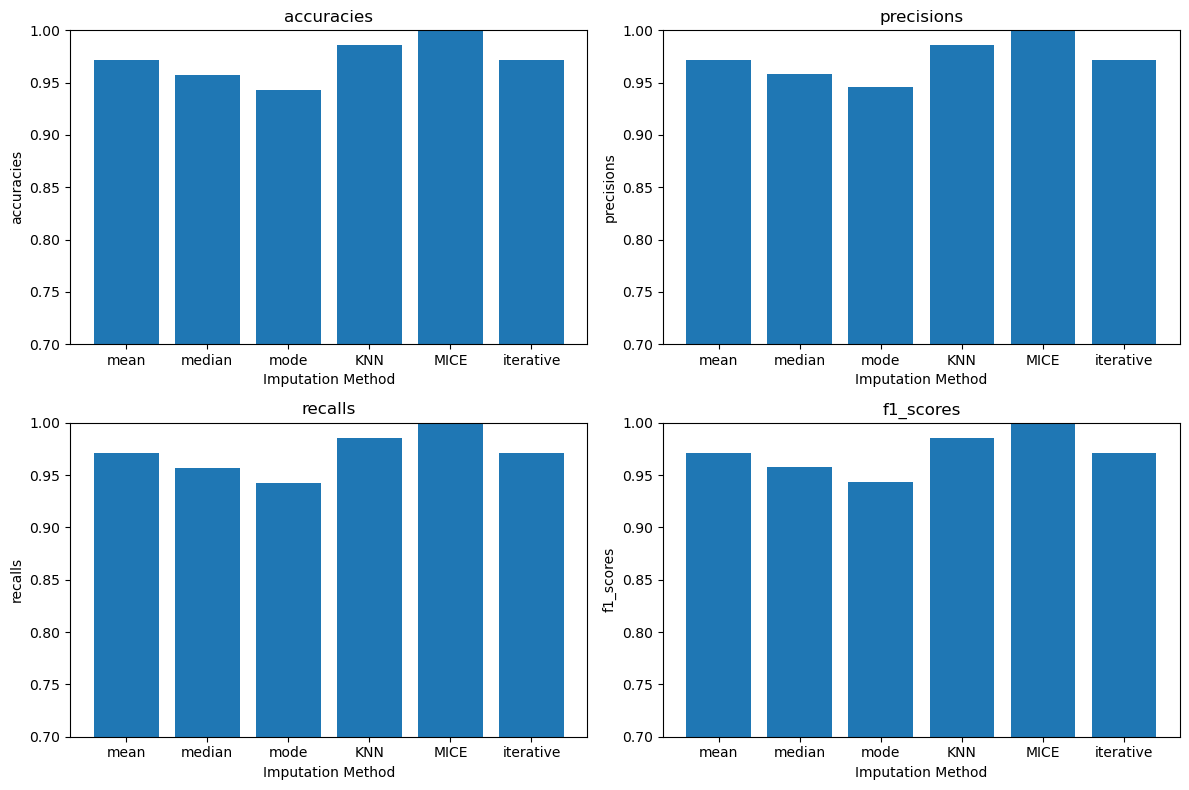

In [4]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


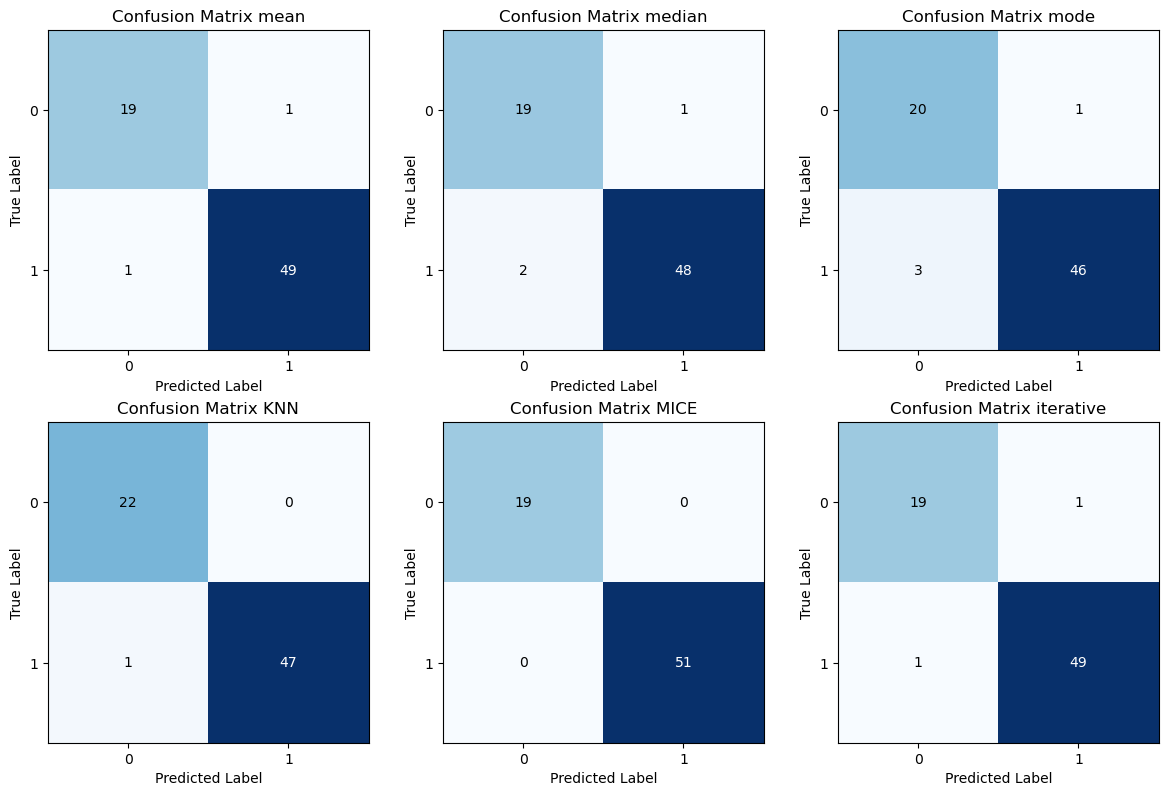

In [5]:
from util.functions import plot_confusion_matrices
plot_confusion_matrices(results['confusion_matrices'])

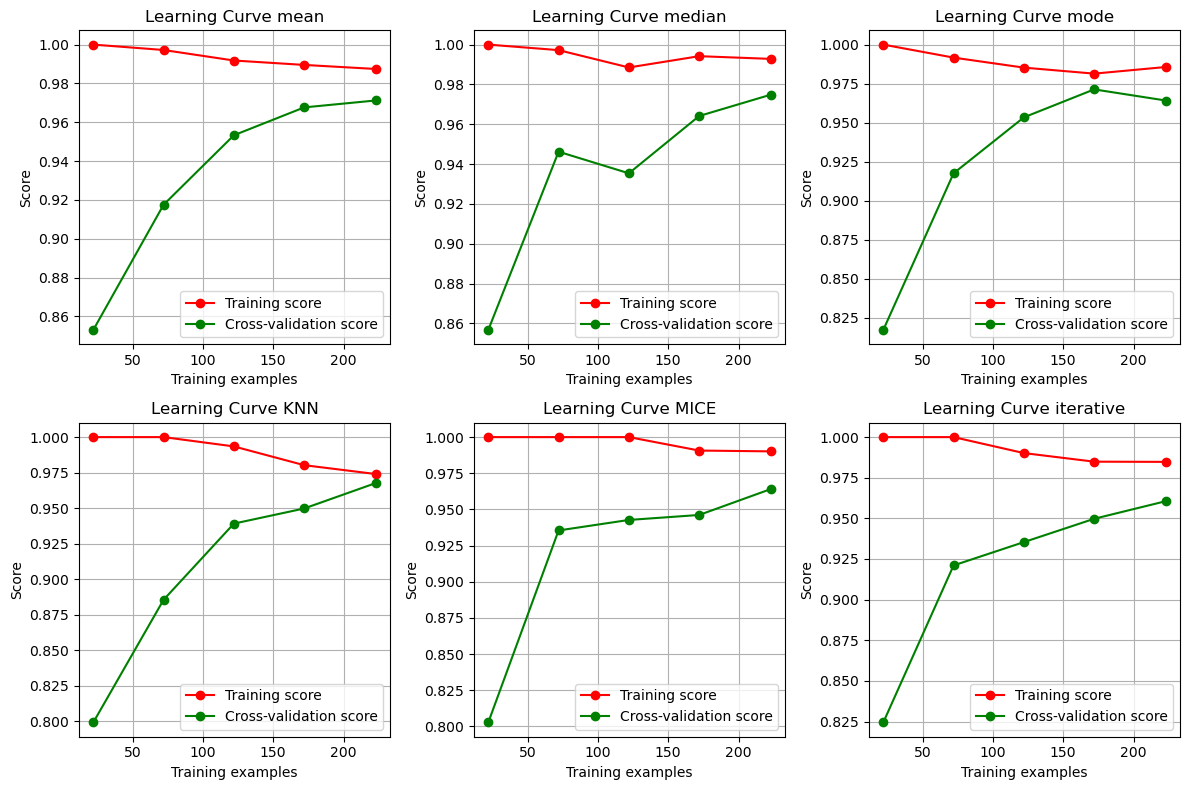

In [6]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

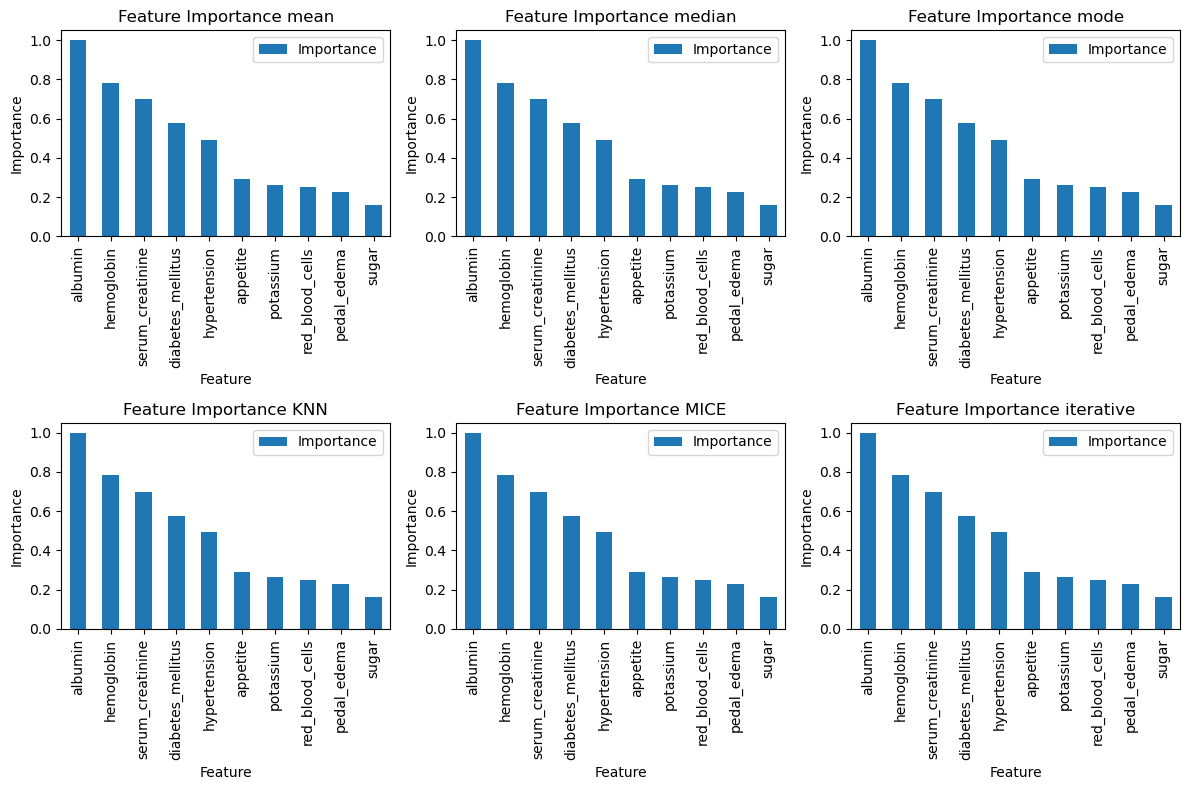

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from util.functions import plot_feature_importances

dataframes = {
    'mean': pd.read_csv('imputed/mean.csv'),
    'median': pd.read_csv('imputed/median.csv'),
    'mode': pd.read_csv('imputed/mode.csv'),
    'KNN': pd.read_csv('imputed/KNN.csv'),
    'MICE': pd.read_csv('imputed/MICE.csv'),
    'iterative': pd.read_csv('imputed/iterative.csv'),
}

# plot all feature importances as subplots
feature_importances = {}
for (name, model) in results['models'].items():
    
    coefficients = model.coef_[0]

    # Take the absolute values
    abs_coefficients = abs(coefficients)

    # Normalize the absolute coefficients
    scaler = MinMaxScaler()
    normalized_coefficients = scaler.fit_transform(abs_coefficients.reshape(-1, 1)).flatten()

    feature_importances[name] = pd.DataFrame({'Importance': normalized_coefficients}, index=dataframes[name].drop(columns=['class']).columns)

plot_feature_importances(feature_importances)